# Use case 3: Signal production and ground distribution

In [1]:
import showermodel as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import toml

This notebook describes how to use the `Telescope` class to set the desired characteristics of a telescope and the `Signal` class to compute the average number of photoelectrons produced in the camera of a telescope that detects a shower.

### Setting telescope characteristics

In UC1, the `Telescope` class was used just to visualize the projection of a shower track from a telescope location, but this class also contains the characteristics needed to calculate the signal for an observed shower (see also UC5 for camera images). The default `Telescope` object assumes a generic telescope with 100 % efficiency in the 290 - 430 nm range, aperture of 10 degrees and 100 m$^2$ area. These characteristics can be modified via the following input parameters:

- `tel_type` : Type of telescope to be used. Default 'generic'.
- `x`, `y`, `z` : East, north and height coordinates of the telescope in km. Default (0, 0, 0).
- `theta`, [`alt`], `az` : Zenith, altitude and azimuth angles in degrees of the telescope pointing direction. Either `theta` or `alt` can be specified, but if `alt` is given, `theta` is overwritten. Default (0, None, 0).
- `apert` : Angular diameter in degrees of the telescope field of view. Default 10.
- `area` : Detection area in m^2 (e.g., mirror area of an IACT). Default 100.
- `N_pix` : Number of camera pixels. Default 1500.
- `int_time` : Integration time in microseconds of camera frames. Default 0.01.
- `wvl`, [`wvl_ini`, `wvl_fin`, `wvl_step`] : Wavelength interval in nm where the efficiency is non zero. Either an array can be passed to `wvl` or the interval can be defined by `wvl_ini`, `wvl_fin`, `wvl_step`, but the latter parameters are ignored if `wvl` is given. Default [290, 430] interval with 3 nm step.
- `eff`, [`eff_fluo`] : Detection efficiency in decimal fraction. `eff` accepts both an array of same dimension as `wvl` or a float value (i.e., if a constant efficiency is assumed). The optional parameter `eff_fluo` is the efficiency at the 57 fluorescence bands. If not given, it is interpolated from `eff`.

When a `Telescope` object is generated, some adittional characteristics are stored as attributes (e.g., the solid angle `sol_angle` of the telescope field of view).

# Default telescope
Wavelength interval: [290. 430.] nm
Angular aperture: 10.0 degrees
Solid angle: 0.024 steradians
Detection area: 100.0 m^2


# Modified telescope
Position: [0.3 0.2 0. ] km
Zenith and azimuth angles: [20. 45.] degrees
Unit vector parallel to the pointing direction: [0.242 0.242 0.94 ]
Detection area: 200.0 m^2


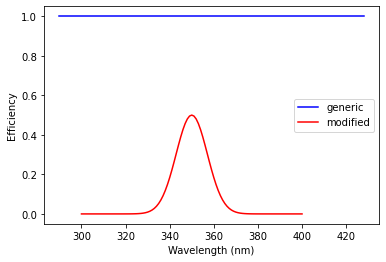

In [2]:
# Default telescope
telescope1 = sm.Telescope()
print("# Default telescope")
print("Wavelength interval:", np.around([telescope1.wvl_ini, telescope1.wvl_fin], 3), "nm")
print("Angular aperture:", telescope1.apert, "degrees")
print("Solid angle:", np.around(telescope1.sol_angle, 3), "steradians")
print("Detection area:", telescope1.area, "m^2")
# 100% efficiency in the 290 - 430 nm range (blue line)
plt.plot(telescope1.wvl, telescope1.eff, 'b', label=telescope1.tel_type);
plt.xlabel("Wavelength (nm)");
plt.ylabel("Efficiency");

# Setting telescope position, pointing direction, detection area and detection efficiency
wvl = np.arange(300., 401., 1.)  # Last value is 400 nm
eff = 0.5* np.exp(- ((wvl - 350.) /10.)**2)  # Pass-band filter centered at 350.
telescope2 = sm.Telescope(x=0.3, y=0.2, theta=20., az=45., area=200., wvl=wvl, eff=eff)
print("\n")
print("# Modified telescope")
print("Position:", np.around([telescope2.x, telescope2.y, telescope2.z], 3), "km")
print("Zenith and azimuth angles:", np.around([telescope2.theta, telescope2.az], 3), "degrees")
print("Unit vector parallel to the pointing direction:", np.around([telescope2.ux, telescope2.uy, telescope2.uz], 3))
print("Detection area:", telescope2.area, "m^2")
# The modified detection efficiency is plotted in red
plt.plot(telescope2.wvl, telescope2.eff, 'r', label='modified');
plt.legend();

In addition, you can select some telescope types with predefined characteristics (from `apert` to `eff`). For example, when setting `tel_type='IACT'`, a telescope is generated with the characteristics a of a typical Imaging Air Cherenkov Telescope. The default values `x`, `y`, `z`, `theta`, `alt` and `az` are unchanged, because the type of telescope does not determine neither its location or its pointing direction.

Angular aperture: 8.0
Detection area: 113.097
Number of pixels: 1800


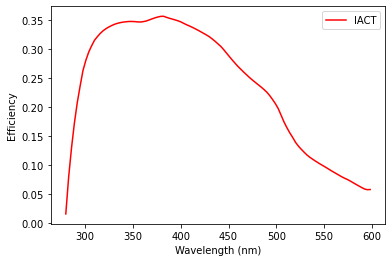

In [3]:
telescope3 = sm.Telescope(tel_type='IACT')
print("Angular aperture:", telescope3.apert)
print("Detection area:", telescope3.area)
print("Number of pixels:", telescope3.N_pix)

plt.plot(telescope3.wvl, telescope3.eff, 'r', label=telescope3.tel_type);
plt.xlabel("Wavelength (nm)");
plt.ylabel("Efficiency");
plt.legend();

Several attributes (not all of them) can be modified after a `Telescope` object is created. In particular, you can modify the location (`x`, `y`, `z`), the pointing direction (`theta`, [`alt`], `az`]) and some general characteristics (i.e., `apert`, `area`, `N_pix` and `int_time`). In doing so, the other attributes are updated automatically. The detection efficiency cannot be modified in this way, because it generally implies to modify several parameters at a time (e.g., `wvl` and `eff`). Instead, use the `copy` method of `Telescope`, which works similarly to that of `Shower` (see UC2).

These tools allow you to modify the characteristics of the telescopes without the need of generating a new `Telescope` object from scratch. Some examples are shown below in this notebook as well as in the one corresponding to UC4.

Help on `Telescope`.

In [4]:
# sm.Telescope?

### User-defined telescope types

You can also define new telescope types in a similar way to atmospheric models (see UC2). The file 'tel_data.toml', available in the 'extra' folder, contains the list of predefined telescope types, with parameters given in a key-value format. So you may modify an existing telescope type or define a new one in this file so that it can be selected via the parameter `tel_type`. In addition, you can change the default `tel_type` of `Telescope` in the file 'showermodel_config.toml'. The parameters `x`, `y`, `z`, `theta`, `alt` and `az` are also stored in 'showermodel_config.toml', not in 'tel_data.toml'. Notice that the modified configuration files must be in the working directory and keep their original names for `ShowerModel` to find them.

In [5]:
tel_data = toml.load("../extra/tel_data.toml")
print("Angular aperture:", tel_data['IACT']['apert'])
print("Detection area:", tel_data['IACT']['area'])
print("Number of pixels:", tel_data['IACT']['N_pix'])

Angular aperture: 8.0
Detection area: 113.097
Number of pixels: 1800


### Signal calculation

`Signal` calculates the number of photoelectrons produced in the camera of a telescope observing a shower in the absence of background. Individual photons are not simulated in `ShowerModel`, but the average signal is obtained by computing the fraction of solid angle covered by the telescope area subtended at each shower point and the angular distribution of light production of each component: Cherenkov emission is highly directional, while fluorescence emission is isotropic. The atmospheric transmission is approximately accounted for by taking a mass attenuation length of 1645 g/cm$^2$ at 350 nm, increasing with wavelength to the fourth power (only Rayleigh scattering is considered).

A `Signal` object is constructed from a `Shower` object and a `Telescope` object. It contains the number of photoelectrons separately from Cherenkov and fluorescence photons emitted at each shower point that is within the telescope field of view.

In [6]:
shower = sm.Shower(theta=20., az=30.)
telescope = sm.Telescope(tel_type='IACT', x=0.3, y=-0.2, theta=20., az=30.)
signal = sm.Signal(telescope, shower)
signal

,Npe_cher,Npe_fluo,Npe_total
24,152.380349,7.673212e-01,153.147670
25,158.273334,7.584793e-01,159.031813
26,163.037788,7.460779e-01,163.783866
27,166.604356,7.302599e-01,167.334616
28,168.930920,7.112318e-01,169.642152
...,...,...,...
194,0.000019,8.626469e-08,0.000019
195,0.000019,8.441638e-08,0.000019
196,0.000018,8.090523e-08,0.000018
197,0.000018,7.755586e-08,0.000018


Note: The very beginning of the shower profile (s<0.01) is ignored to speed up calculations.

By default, both the atmospheric transmission and the telescope efficiency are included, but they may be turned off via the input parameters `atm_trans` and `tel_eff`, respectively. If the telescope efficiency is not included, i.e., `tel_eff=False`, a 100\% detection efficiency is assumed within the wavelength interval defined by the parameters `wvl_ini` and `wvl_fin` (default 290 and 430 nm). An additional parameter `wvl_step` (default 3 nm) specifies the discretization step to integrate the wavelenght-dependent atmospheric transmission.

In [7]:
# Neither the atmospheric transmission nor the detection efficiency is included
# It is assumed 100% efficiency in the 290 - 430 nm range
# signal2 = sm.Signal(telescope, shower, atm_trans=False, tel_eff=False)

# The atmospheric atmospheric is included, but the detection efficiency is not
# The wavelength interval is modified to start at 350 nm
signal2 = sm.Signal(telescope, shower, tel_eff=False, wvl_ini=350., wvl_fin=500., wvl_step=5.)

A `Signal` object stores the constituents `Shower` and `Telescope` objects as well as the `Projection` object generated from them, which is needed to calculate the signal. The `Atmosphere`, `Track`, `Profile`, `Cherenkov` and `Fluorescence` objects stored in `Shower` can also be accessed as attributes of `Signal`.

In [8]:
# signal.shower
# signal.telescope
# signal.projection
# signal.atmosphere  # Equivalent to signal.shower.atmosphere or signal.projection.atmosphere
# signal.cherenkov

There are some adittional attributes of `Signal`.

In [9]:
print("Atmospheric transmission included:", signal.atm_trans)
print("Telescope efficiency included:", signal.tel_eff)
print("Wavelenght range:", np.around([signal.wvl_ini, signal.wvl_fin, signal.wvl_step], 3))
print("Sum of photoelectrons due to Cherenkov light:", np.around(signal.Npe_cher_sum))
print("Sum of photoelectrons due to fluorescence light:", np.around(signal.Npe_fluo_sum))
print("Sum of photoelectrons due to both light components:", np.around(signal.Npe_total_sum))

Atmospheric transmission included: True
Telescope efficiency included: True
Wavelenght range: [280.  599.5   3. ]
Sum of photoelectrons due to Cherenkov light: 3671.0
Sum of photoelectrons due to fluorescence light: 13.0
Sum of photoelectrons due to both light components: 3684.0


`Signal` has a method to plot the signal evolution as a function of both time and beta angle, which is the angular distance of the shower track from the apparent position of the cosmic-ray source. In the example below, the shower is perfectly aligned with the axis of an IACT so that the signal is completely dominated by Cherenkov light.

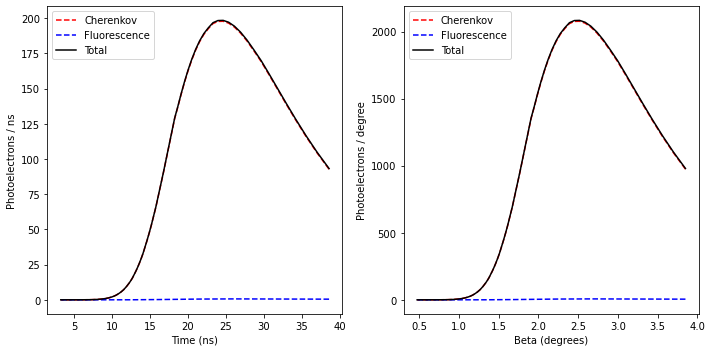

In [10]:
shower = sm.Shower(theta=20., az=30.)
telescope = sm.Telescope(tel_type='IACT', x=0.3, y=-0.2, theta=20., az=30.)
signal = sm.Signal(telescope, shower)
signal.show();

It also has some inherited methods from `Shower` and `Projection`.

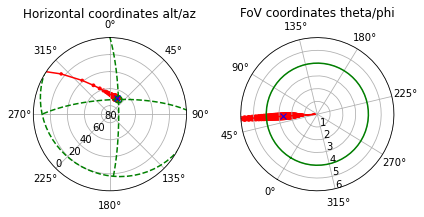

In [11]:
# signal.show_profile();
# signal.show_light_production();
signal.show_projection(max_theta=6.);  # Equivalent to shower.show_projection(telescope, max_theta=6.)

Help on `Signal`, including the full list of input parameters, attributes and methods.

In [12]:
# sm.Signal?

### Example of signal calculation in 'fluorescence mode'

Let's assume a 1 EeV proton shower is observed transversely by a fluorescence telescope similar to an IACT, but with larger aperture. The telescope is pointed at the shower maximum.

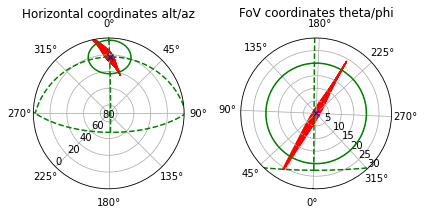

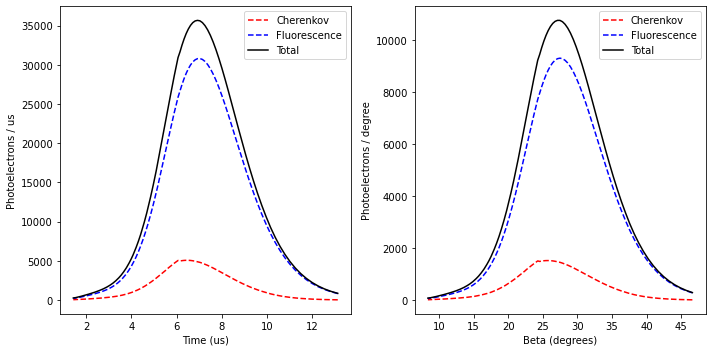

In [13]:
shower = sm.Shower(E=1.e12, prf_model='Gaisser-Hillas', X_max=500., x0=-2.5, y0=12., theta=45., az=20.)
# Large FoV fluorescence telescope at the origin of coordinates
telescope = sm.Telescope(tel_type='IACT', apert=40.)

x, y, z = shower.track.X_to_xyz(500.)  # Coordinates of shower maximum
distance, alt, az, theta, phi = telescope.spherical(x, y, z)
# Makes the telescope to point at the shower maximum
telescope.alt = alt
telescope.az = az
signal = sm.Signal(shower, telescope)

signal.show_projection(max_theta=30.);
signal.show();

Next, the detection efficiency is replaced by the above-defined pass-band filter centered at 350 to see the effect on the signal.

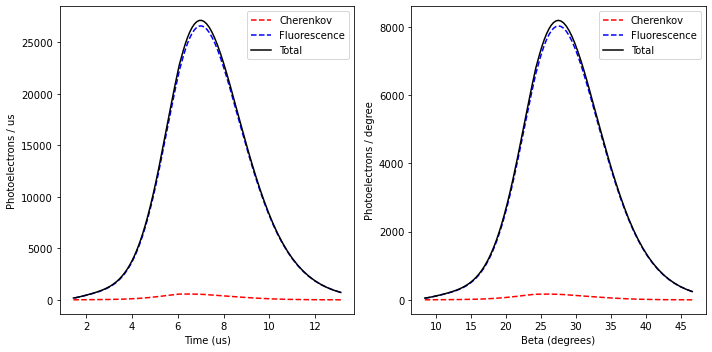

In [14]:
wvl = np.arange(300., 401., 1.)  # Last value is 400 nm
eff = 0.5* np.exp(- ((wvl - 350.) /10.)**2)  # Pass-band filter centered at 350.
telescope_filter = telescope.copy(wvl=wvl, eff=eff)
signal = sm.Signal(shower, telescope_filter)
signal.show();

### Photon distribution

`Shower` has the method `show_distribution` that calculates the photon distribution on a horizontal plane and plot it. By default, it uses a square grid of 2x2 km$^2$ on ground centered at the origin of the coordinate system and with a discretization step of 0.2 km. The wavelenght interval of 290 - 430 nm is assumed. But you can modify the center position of the grid including the height (`x_c`, `y_c`, `z_c`), the grid dimensions (`size_x` and `size_y`), the number of cells along both axes (`N_x`, `N_y`) and the wavelength interval (`wvl_ini`, `wvl_fin` and `wvl_step`).

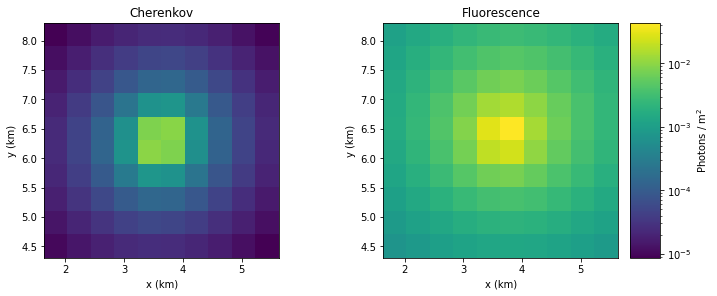

In [15]:
shower = sm.Shower(theta=20., az=30.)

# Default photon distribution
# shower.show_distribution();

# Setting grid position, height, dimensions and numeber of cells
x_c, y_c, z_c = shower.track.h_to_xyz(20.)  # Coordinates of shower point at 20 km a.s.l.
shower.show_distribution(x_c=x_c, y_c=y_c, z_c=z_c, size_x=4., size_y=4., N_x=10, N_y=10);  # Distribution at 20km a.s.l.

In case of a linear grid (i.e., either `N_x=1` or `N_y=1`), a 1D plot is generated instead.

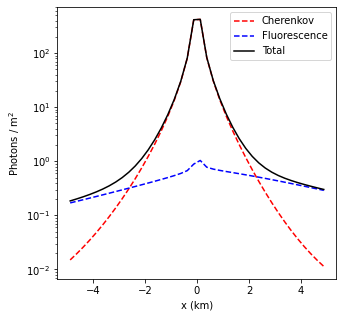

In [16]:
shower.show_distribution(size_x=10., N_x=40, N_y=1);

The atmospheric transmission is included by default, but it can also be turned off.

In [17]:
#shower.show_distribution(size_x=10., N_x=40, N_y=1, atm_trans=False);

In the above examples, all the photons with incident angles from 0 to 90 degrees are considered. However, this method also allows you to calculate the density of photons that would be collected by a grid of telescopes with a certain angular aperture and pointing direction.

Below, a grid of telescopes of type 'IACT' observe an off-axis shower, which is outside the field of view of some telescopes.

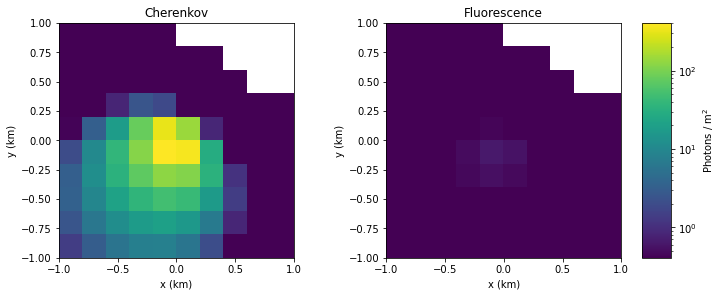

In [18]:
shower = sm.Shower(theta=20., az=30.)
shower.show_distribution(tel_type='IACT', theta=23., az=30., wvl_ini=300., wvl_fin=450.);

# Equivalent to 
# telescope = sm.Telescope(tel_type='IACT', theta=23., az=30.)
# shower.show_distribution(telescope=telescope, wvl_ini=300., wvl_fin=450.);

In this case, the telescope efficiency can be turned on to obtain the photoelectron distribution instead of the photon distribution. Notice the change of scale in the color bar in the example below.

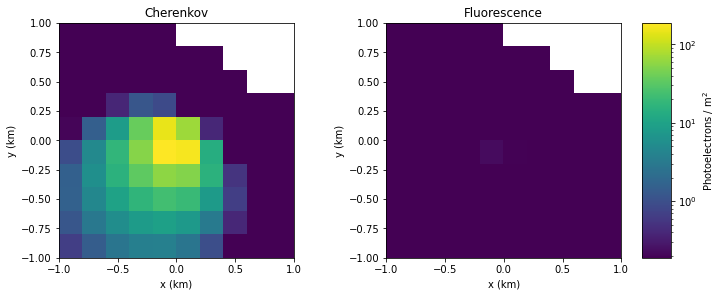

In [19]:
shower.show_distribution(tel_type='IACT', theta=23., az=30., tel_eff=True);

Note: If `tel_eff=True`, the parameters `wvl_ini`, `wvl_fin` and `wvl_step` are ignored, because the wavelenght interval and efficiency of the input telescope is used instead.

Help on `show_distribution`.

In [20]:
# shower.show_distribution?